In [1]:
import pandas as pd
import spacy

In [2]:
df = pd.read_csv('trump_insult_tweets_2014_to_2021.csv')

In [3]:
df

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
sample= df['insult'].head(4).to_list()[-1]

In [6]:
doc = nlp(sample)

In [7]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Cardin 22 28 GPE
Baltimore 49 58 GPE


In [8]:
df['insult'].value_counts()

Fake News                                                                                                                                    431
Crooked                                                                                                                                      266
Sleepy Joe                                                                                                                                   129
failing                                                                                                                                       82
Crooked Hillary                                                                                                                               77
                                                                                                                                            ... 
Total Fake Poll                                                                                                                   

## Breakdown by ?

Understanding types of insults
* word cloud -> toggle by time window
* 


Processing
1. lower case all insults
2. strip punctuations
3. remove stop words
4. group overlapping phrases

How to group by meaning though?

In [9]:
import string
all_stopwords = nlp.Defaults.stop_words


In [10]:
from wordcloud import WordCloud

In [11]:
insults = df['insult'].value_counts().to_dict()

In [12]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [13]:
text = []
for k, v in insults.items():
    l = k.lower().translate(str.maketrans('', '', string.punctuation)).split(" ")
    l = list(filter(lambda x: x not in all_stopwords, l))
    for i in range(v):
        text.extend(l)

In [14]:
text = " ".join(text)

In [20]:
# word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=2000).generate_from_frequencies(insults)


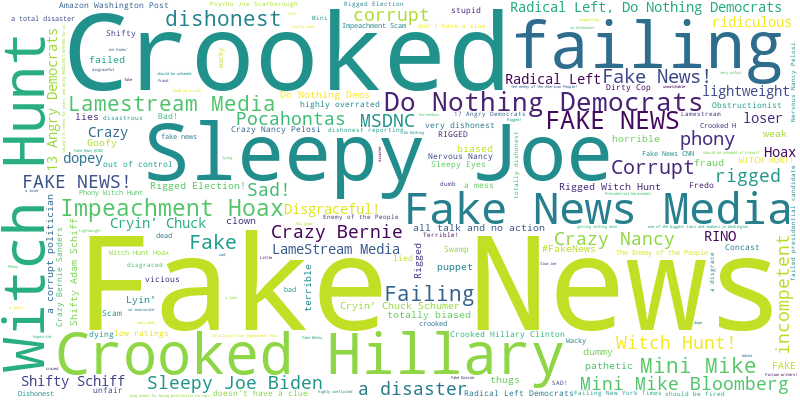

In [22]:
wordcloud.to_image()

## insult creativeness

In [28]:
df['length'] = df['insult'].apply(lambda x: len(x.split(' ')))

<AxesSubplot:>

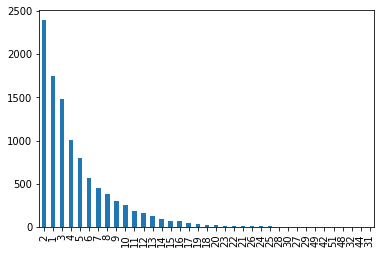

In [31]:
fig, ax = plt.subplots()
df['length'].value_counts().plot(ax=ax, kind='bar')

In [40]:
# compare single words
from collections import Counter
c = Counter(text.split(' '))



In [42]:
c.most_common(100)

[('fake', 1011),
 ('news', 841),
 ('', 415),
 ('crooked', 409),
 ('bad', 305),
 ('witch', 286),
 ('hunt', 284),
 ('corrupt', 255),
 ('media', 234),
 ('people', 225),
 ('totally', 211),
 ('joe', 204),
 ('democrats', 200),
 ('sleepy', 197),
 ('total', 195),
 ('failing', 178),
 ('hoax', 177),
 ('crazy', 165),
 ('dishonest', 161),
 ('country', 159),
 ('rigged', 155),
 ('phony', 144),
 ('weak', 136),
 ('hillary', 131),
 ('left', 130),
 ('history', 128),
 ('election', 127),
 ('radical', 124),
 ('disaster', 115),
 ('scam', 109),
 ('terrible', 107),
 ('crime', 107),
 ('ratings', 106),
 ('failed', 104),
 ('great', 102),
 ('like', 100),
 ('impeachment', 95),
 ('job', 93),
 ('worst', 92),
 ('lamestream', 89),
 ('fraud', 87),
 ('time', 87),
 ('want', 87),
 ('wrong', 83),
 ('big', 80),
 ('years', 77),
 ('nancy', 76),
 ('angry', 74),
 ('money', 74),
 ('sad', 73),
 ('reporting', 73),
 ('democrat', 73),
 ('badly', 71),
 ('political', 71),
 ('lost', 70),
 ('illegal', 70),
 ('got', 68),
 ('mike', 66),
 

## wordtrees

Create wordtrees of tweets using the most common words in the insult list

In [33]:
for k, v in insults.items():
    l = k.lower().translate(str.maketrans('', '', string.punctuation)).split(" ")
    l = list(filter(lambda x: x not in all_stopwords, l))
    print(l)

['fake', 'news']
['crooked']
['sleepy', 'joe']
['failing']
['crooked', 'hillary']
['witch', 'hunt']
['fake', 'news', 'media']
['democrats']
['fake', 'news']
['impeachment', 'hoax']
['failing']
['dishonest']
['mini', 'mike']
['lamestream', 'media']
['corrupt']
['fake']
['phony']
['fake', 'news']
['sleepy', 'joe', 'biden']
['corrupt']
['witch', 'hunt']
['crazy', 'nancy']
['crazy', 'bernie']
['msdnc']
['sad']
['incompetent']
['mini', 'mike', 'bloomberg']
['rigged']
['pocahontas']
['fake', 'news']
['disaster']
['radical', 'left', 'democrats']
['hoax']
['lamestream', 'media']
['ridiculous']
['rino']
['crazy']
['lightweight']
['radical', 'left']
['shifty', 'schiff']
['13', 'angry', 'democrats']
['disgraceful']
['dopey']
['cryin’', 'chuck']
['loser']
['cryin’', 'chuck', 'schumer']
['failed']
['rigged']
['goofy']
['corrupt', 'politician']
['rigged', 'election']
['weak']
['rigged', 'witch', 'hunt']
['talk', 'action']
['dems']
['horrible']
['terrible']
['totally', 'biased']
['dummy']
['biased']


['lost', 'control', 'lost', 'mind']
['pompous']
['got', 'far', 'money', 'texas', '', 'florida', 'combined', 'government', 'can’t', 'right']
['given']
['corrupt', 'election', 'history', 'far']
['matters']
['trying', 'steal', 'election']
['antitrump']
['stifled', 'growth', 'point', 'obvious']
['embarrassed', 'country', 'email', 'lies']
['”mentally“', 'competition']
['talk', '', 'action']
['dont', 'need', 'angry', 'advice']
['campaign', 'total', 'disarray']
['gone', 'soon']
['uncomfortable', 'looking']
['players', 'stood', 'proudly', 'flag', 'anthem', 'shown', 'broadcast', 'maybe', 'ratings', 'come']
['smart']
['truly', 'control']
['weak', 'crime', '', 'borders']
['went', 'southern', 'border', 'screams', 'good', 'people', 'despite', 'congresses', 'failure', 'fix', 'loopholes', 'asylum', 'work']
['she’s', 'mess']
['actually', 'argentina', 'bad', 'reasons']
['far', '“angels”']
['dying', 'fast']
['hostile', 'basket', 'case', 'feels', 'jilted']
['comes', 'crazed', '', 'stumbling', 'lunatic']


['stolen']
['covered', 'hillarys', 'massive', '“hacking”', 'coughing', 'attack']
['hard', 'believe', 'lindsey', 'graham', 'saving', 'soldier', 'lives', '', 'billions', '']
['racebaiting']
['lost', 'touch']
['evidence', 'crime', 'read', 'transcripts', '“no', 'pressure”', 'impeachment', 'hoax']
['won’t', 'history', 'winner', 'time', 'great', 'spoiler']
['gave', 'process']
['lied']
['voting', 'disaster']
['looking', 'good', 'lawyer', 'strongly', 'suggest', 'don’t', 'retain', 'services', 'michael', 'cohen']
['boring', 'articles']
['rigged', 'witch', 'hunt']
['liddle', 'adam', 'schiff']
['outrageous']
['absolutely', 'horrible', 'job', 'securing', 'border']
['kind', 'opponent', 'dreams']
['depleted', 'food', 'starved', 'regime', 'inform', 'nuclear', 'button']
['mormons', 'dont', 'like', 'liars']
['uses', 'unnamed', 'sources', 'sources', 'don’t', 'exist']
['failed', 'campaign', 'manager', 'mitt', 'romneys', 'historic', 'loss']
['big', 'crooked', 'hillary', 'law', 'firm']
['collusion', 'crazy'

['dishonest', 'fool']
['nancy', 'pelosichuck', 'schumer', 'democrat']
['boring']
['don’t', 'threaten', 'people', 'joe']
['doesnt', 'votes']
['greatest', 'political', 'crime', 'history']
['believe', 'country']
['tell', '‘protest’', 'time']
['democrat', 'position', 'abortion', 'extreme', 'don’t', 'mind', 'executing', 'babies', 'birth']
['joke']
['“wires', 'tapped”', 'trump', 'tower', 'victory']
['dumb', 'mouthpiece']
['fake', 'reporter']
['weak', 'border', 'security']
['thomas', '“the', 'chin”', 'friedman']
['election', 'process', 'worse', 'world', 'countries']
['horrible', 'attitude']
['embarrassment', 'great', 'state', 'nebraska']
['castro', 'lover']
['reads']
['number', 'dangerous', 'country', 'world']
['viewers', 'beware']
['treason']
['tedcruz', 'new', 'york', 'based', 'campaign', 'contributions', 'special', 'interests', 'control']
['treason', 'sedition', 'insurrection']
['vp', 'candidate', 'failed', 'badly']
['discredited']
['propaganda', 'machine', 'amazon']
['psycho', 'joe', '“wh

['horrible', 'abuses']
['job', 'jeopardy']
['ushistory', 'lied', 'defrauded', 'voters', 'like', 'senator', 'richard', 'blumenthal']
['dishonest', 'man', 'politics']
['bring', 'mommy', 'slap']
['mistake']
['totally', 'fake']
['weak', 'puppet', 'crazy', 'nancy', 'pelosi']
['lied', 'week']
['crooked', 'cop']
['unpopular']
['nuts']
['miserable']
['corrupt', 'dishonest', 'media', 'outlet']
['dont', 'shop', 'christmas']
['gets', 'worse', 'worse', 'day']
['total', 'witch', 'hunt', 'like', 'american', 'history']
['playing', 'games']
['lamestream', 'fake', 'news', 'media']
['wise', 'guy']
['allowed', 'state', 'scammed']
['exception', 'hillary', 'far', 'worst', 'offender']
['highly', 'neurotic']
['got', 'wrong', 'usual']
['hoax']
['corrupt', 'politician', 'probably', 'sick', 'man']
['totally', 'compromised', 'conflicted', '', 'witch', 'hunt']
['throw', 'massie', 'republican', 'party']
['win', 'state', 'votes', 'nonrepresentative', 'delegates', 'offered', 'sorts', 'goodies', 'cruz', 'campaign', '

['dishonest', 'politician']
['bad', 'judgment']
['lousy', 'candidate', 'lots', 'bad', 'policy']
['nosedived']
['failed', 'presidential', 'candidate']
['energy', 'left']
['greatest', 'witch', 'hunt', 'history', 'far']
['wants', 'shut', 'home', 'bed']
['let', 'best', 'friend', 'lg']
['disgruntled', 'boring', 'fool', 'wanted', 'war']
['disaster', 'let']
['focus', 'cleaning', 'filthy', 'canopies', 'doors', 'windows']
['acted', 'meek', 'mild']
[]
['writes', 'false', 'story', 'false', 'story']
['years', 'bad', 'dem', 'mgmt']
['theres', 'like', 'lies']
['american', 'disgrace']
['democrats']
['gaffe', 'machine']
['disaster']
['speak', 'badly', 'country']
['big', 'story', 'covered', 'fake', 'news']
['truly', 'stupid']
['weekend', 'afternoons', 'worst']
['hopeless', '‘presidential’', 'campaign']
['ratings', 'disaster']
['didnt', 'bathroom', 'approval', 'leakin', 'james', 'comey']
['informed', 'august', 'russian', 'meddling']
['big', 'failure', 'tv']
['failed', 'poorly', 'rated']
['hillary', 'sai

['weak', 'great', 'vets']
['phony', 'photo']
['people', 'forced', 'lie']
['fake', 'news']
['resist', 'obstruct']
['boring']
['anonymous', 'sources']
['focus', 'real', 'crime', 'problem']
['willing', 'write', 'truthful']
['17', 'angry', 'dems']
['biggest', 'political', 'scandal', 'american', 'history']
['total', 'meltdown']
['massive', 'deficit', 'bad', 'jobs', 'forecast', 'mess']
['like', 'high', 'taxes', '', 'crime', 'he’s', 'man']
['cheating', 'bernie', 'nom']
['worth', 'watching']
['look', 'guy’s', 'past', 'watch', 'happens']
['doesnt', 'know']
['makes', 'sure', 'trending', 'twitter', 'bad']
['cares', 'political', 'power']
['fake', 'news', 'wonder', 'ratings', 'cnn', 'way']
['violated', 'campaign', 'finance', 'laws', 'highest', 'sinister', 'level']
['angry', 'psycho']
['innercircle']
['winning', 'press', 'refusing', 'report']
['alfred', 'e', 'newman', 'president']
['real', 'enemy', 'people']
['economy', 'dead', 'worse']
['worst', 'mayor', 'history', 'new', 'york', 'city']
['lost', '

['people', 'idea', 'fake', 'lamestream', 'media']
['gave', 'enlisted', 'mommy', 'brother']
['fan']
['blew', 'election', 'lost']
['florida', 'ads', 'lies']
['poor', 'job', 'bringing', 'island', 'health']
['open', 'borders', 'open', 'arms', 'policy']
['better', 'tires', 'far']
['bad', 'healthcare']
['story', 'fake', 'like', '“paper”']
['working', 'overtime', 'follow', 'lead', 'friends', 'defeated', 'dems']
['pelosi', 'schiff', 'scam', 'republican', 'party']
['setup', '', 'trap']
['voter', 'fraud', 'detroit', 'rampant']
['got', 'wrong']
['unhinged', 'corrupt']
['think', 'fed', 'gotten', 'right']
['betrayed', 'hispanicamericans']
['founders', 'mind']
['matter', 'big', 'important', 'story', 'slightly', 'positive', '‘us’', 'negative', '‘them’', 'reported']
['weak', 'ineffective', 'rino', 'section']
['quantitative', 'tightening', 'killer']
['bad', 'usa']
['badly', 'written', '', 'reseached', 'disaster']
['good', 'job', 'jeff']
['story', 'john', 'kelly', 'isn’t', 'true', 'hit', 'job']
['ending

In [34]:
import wordtree

In [37]:
documents = insults
g = wordtree.search_and_draw(corpus = documents, keyword = "crooked")
g.render() # creates a file world.dv.png

  0%|          | 0/6729 [00:00<?, ?it/s]

'crooked.gv.png'

In [100]:
twt = df['tweet'].value_counts().to_dict()

In [106]:
g = wordtree.search_and_draw(corpus = twt, keyword = "virus")
g.render() # creates a file world.dv.png

  0%|          | 0/5673 [00:00<?, ?it/s]

'virus.gv.png'